You need to submit 3 heat maps, 3 spatial charts and 3 contour charts using Tableau or PowerBI, Python and R using the data below (or your own datasets). You can also use D3. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.

### Libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.offline as plo

### Data read

In [2]:
# Read world population data
dirData = 'ex5-2/'
f_costco = 'costcos-geocoded.csv'
f_ppg = 'ppg2008.csv'

dir_costco = dirData+f_costco
dir_ppg = dirData+f_ppg

costco = pd.read_csv(dir_costco)
ppg = pd.read_csv(dir_ppg)

# summarize statewide Costco store count

costco_sum = pd.Series.to_frame(costco.groupby('State')['Address'].count())
costco_sum = costco_sum.rename({'Address':'store_count'}, axis=1, inplace=False)
costco_sum = pd.DataFrame(costco_sum.to_records())

### Heat Map

<AxesSubplot:>

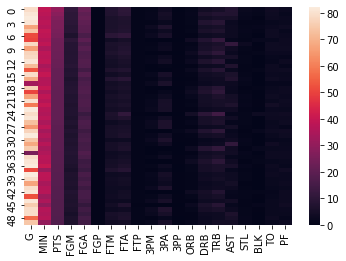

In [3]:
sns.heatmap(ppg.iloc[:,1:])

### Spatial Plot

In [4]:
# plot the costco store count across US states

data=[dict(type='choropleth', autocolorscale = False,
           locations=costco_sum['State'], z=costco_sum['store_count'], 
           locationmode='USA-states', colorscale='YlOrRd', 
           colorbar=dict(title='Store Count'))]

layout = dict(title='Costco Store Count',
              geo=dict(scope='usa', projection=dict(type='albers usa'), 
                       showlakes=True, lakecolor='rgb(66,165,245)'))

fig=dict(data=data, layout=layout)

plo.plot(fig)

'temp-plot.html'

### Countour plot

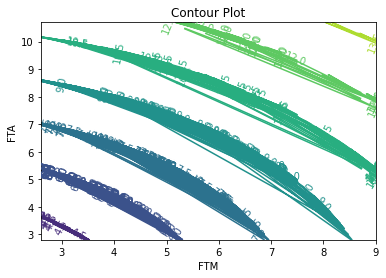

In [5]:
%matplotlib inline

# define function

def f(x, y):
    """
    Args:
        two numpy arrays (x, y)
    Returns:
        square root of sum of square of x and y
    """
    return np.sqrt(x**2 + y**2)

x = np.array(ppg['FTM'])
y = np.array(ppg['FTA'])

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('FTM')
plt.ylabel('FTA')
plt.show()

**End of code**